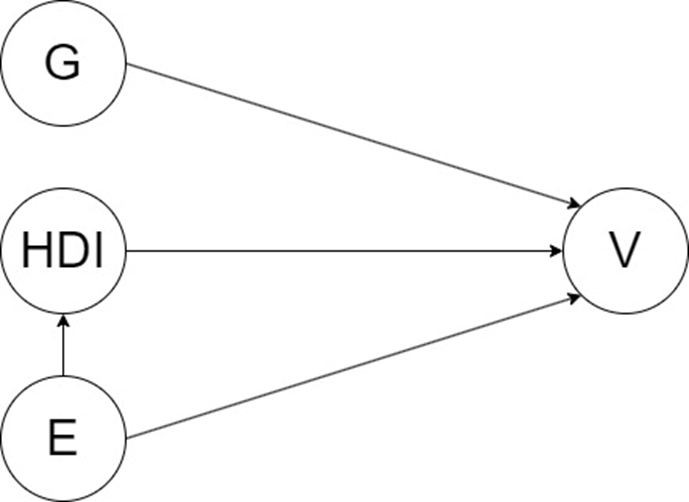

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from cmdstanpy import CmdStanModel


file_path = 'data/main_data.xlsx'
data = pd.read_excel(file_path)

data.head()


C:\Users\szczy\AppData\Roaming\Python\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,Year,State,Democratic %,Gun ownership %,HDI,Unemployment %
0,1992,Alabama,0.409,0.552,0.839,0.07525
1,1996,Alabama,0.432,0.568,0.850,0.05208
2,2000,Alabama,0.416,0.538,0.853,0.04625
3,2004,Alabama,0.368,0.516,0.861,0.05575
4,2008,Alabama,0.387,0.503,0.867,0.05883


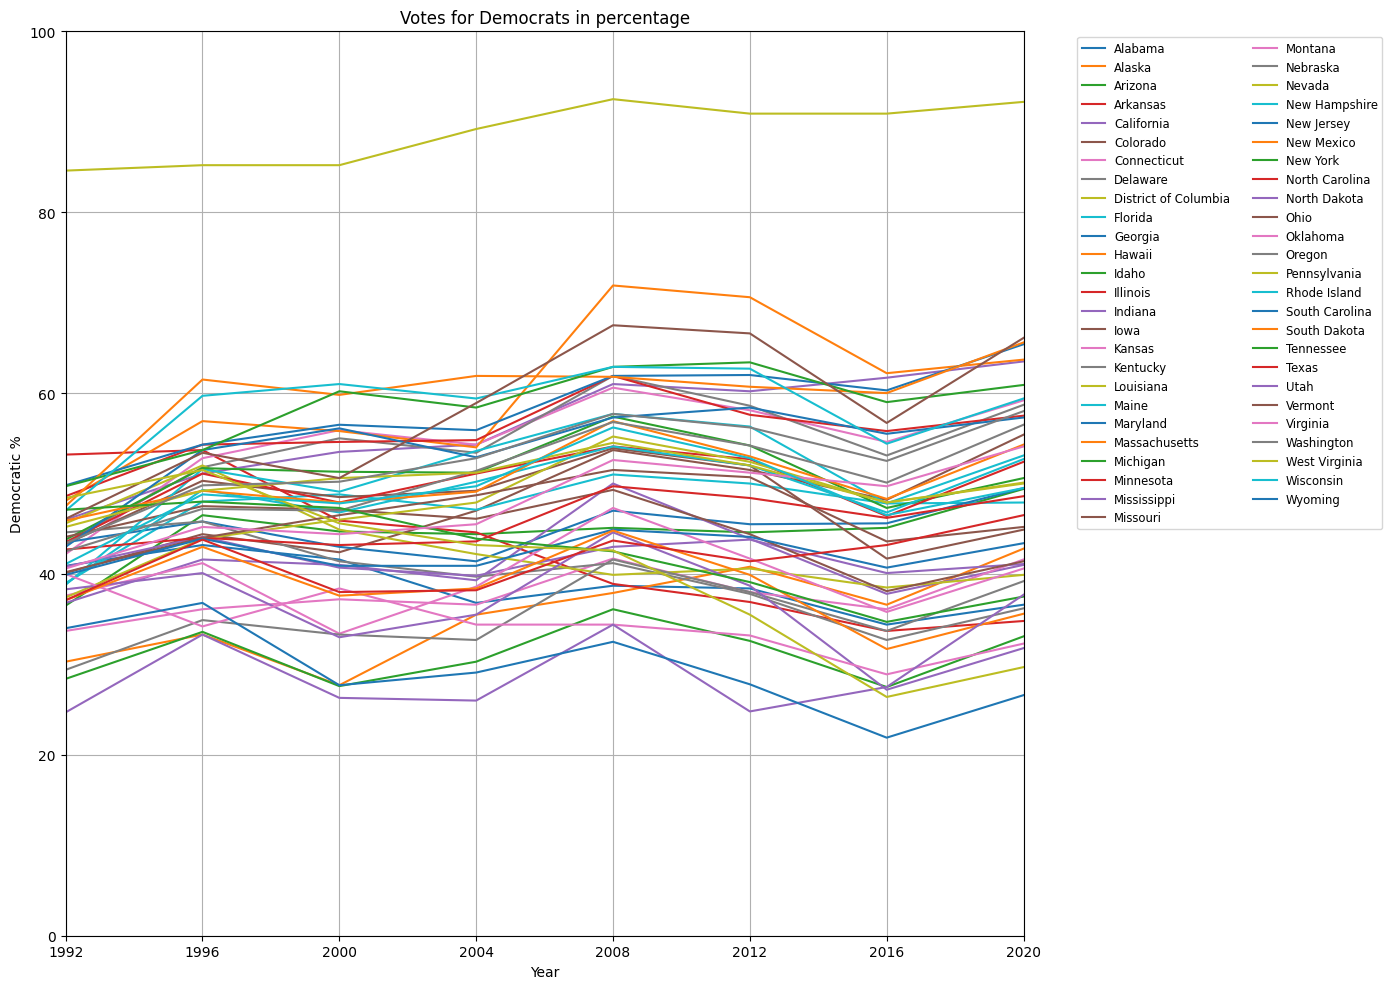

In [2]:
plt.figure(figsize=(14, 10))

for state in data["State"].unique():
    state_data = data[data["State"] == state]
    plt.plot(state_data["Year"], state_data["Democratic %"] * 100, label=state)

plt.xlabel('Year')
plt.ylabel('Democratic %')
plt.title('Votes for Democrats in percentage')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small', ncol=2)
plt.grid(True)
plt.tight_layout()
plt.xticks(np.linspace(1992, 2020, 8))
plt.xlim([1992, 2020])
plt.ylim([0, 100])
plt.show()


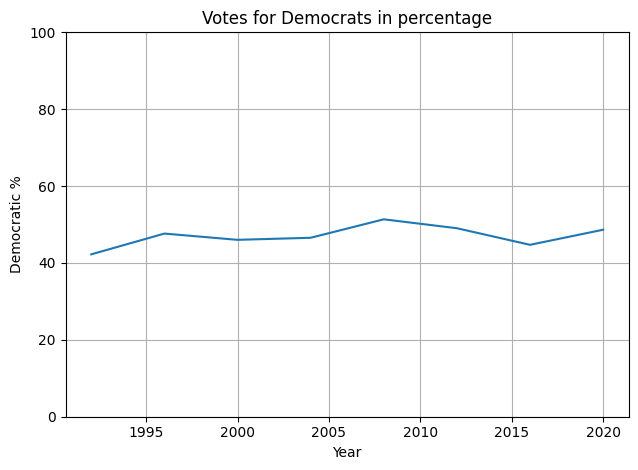

In [3]:
mean_democratic_votes = [data[data['Year'] == year]['Democratic %'].mean()*100 for year in data["Year"].unique()]

plt.plot(data["Year"].unique(), mean_democratic_votes)

plt.xlabel('Year')
plt.ylabel('Democratic %')
plt.title('Votes for Democrats in percentage')
plt.grid(True)
plt.tight_layout()
# plt.xticks(np.linspace(1992, 2020, 8))
# plt.xlim([1992, 2020])
plt.ylim([0, 100])
plt.show()


In [4]:
file_path = 'data/main_data.xlsx'
data = pd.read_excel(file_path, engine='openpyxl')

print(data.isna().sum())

data = data.dropna()

print("Columns in the dataframe:", data.columns)

data['Year'] = data['Year'].astype(str).str.strip()

stan_file_path = 'model_1.stan'  
model_1 = CmdStanModel(stan_file=stan_file_path)

input_model_1 = {
    'N': len(data), 
    'V': data['Democratic %'].values, 
    'G': data['Gun ownership %'].values, 
    'HDI': data['HDI'].values
}

fit = model_1.sample(data=input_model_1, chains=1, seed=28052020, show_console=True)

df_fit = fit.draws_pd()


Year               0
State              0
Democratic %       0
Gun ownership %    0
HDI                0
Unemployment %     0
dtype: int64
Columns in the dataframe: Index(['Year', 'State', 'Democratic %', 'Gun ownership %', 'HDI',
       'Unemployment %'],
      dtype='object')


17:46:52 - cmdstanpy - INFO - Chain [1] start processing


Chain [1] method = sample (Default)
Chain [1] sample
Chain [1] num_samples = 1000 (Default)
Chain [1] num_warmup = 1000 (Default)
Chain [1] save_warmup = 0 (Default)
Chain [1] thin = 1 (Default)
Chain [1] adapt
Chain [1] engaged = 1 (Default)
Chain [1] gamma = 0.05 (Default)
Chain [1] delta = 0.8 (Default)
Chain [1] kappa = 0.75 (Default)
Chain [1] t0 = 10 (Default)
Chain [1] init_buffer = 75 (Default)
Chain [1] term_buffer = 50 (Default)
Chain [1] window = 25 (Default)
Chain [1] save_metric = 0 (Default)
Chain [1] algorithm = hmc (Default)
Chain [1] hmc
Chain [1] engine = nuts (Default)
Chain [1] nuts
Chain [1] max_depth = 10 (Default)
Chain [1] metric = diag_e (Default)
Chain [1] metric_file =  (Default)
Chain [1] stepsize = 1 (Default)
Chain [1] stepsize_jitter = 0 (Default)
Chain [1] num_chains = 1 (Default)
Chain [1] id = 1 (Default)
Chain [1] data
Chain [1] file = C:\Users\szczy\AppData\Local\Temp\tmpusr45qer\g_ydw9b2.json
Chain [1] init = 2 (Default)
Chain [1] random
Chain [1] s

17:46:54 - cmdstanpy - INFO - Chain [1] done processing
17:46:54 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'model_1.stan', line 16, column 4 to column 53)
17:46:54 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 19 divergent transitions (1.9%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.


Chain [1] Iteration: 2000 / 2000 [100%]  (Sampling)
Chain [1] 
Chain [1] Elapsed Time: 0.665 seconds (Warm-up)
Chain [1] 1.258 seconds (Sampling)
Chain [1] 1.923 seconds (Total)
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 


In [5]:
df_fit.head()


,chain__,iter__,draw__,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,...,V_pred[399],V_pred[400],V_pred[401],V_pred[402],V_pred[403],V_pred[404],V_pred[405],V_pred[406],V_pred[407],V_pred[408]
0,1.0,1.0,1.0,704.810,0.795203,0.089032,5.0,31.0,0.0,-703.962,...,0.376446,0.555466,0.469926,0.592177,0.555061,0.516173,0.673604,0.462388,0.641430,0.588340
1,1.0,2.0,2.0,705.377,0.946654,0.089032,3.0,7.0,0.0,-703.508,...,0.747141,0.495734,0.418341,0.418282,0.568372,0.480604,0.499708,0.363784,0.540267,0.592486
2,1.0,3.0,3.0,705.241,0.991971,0.089032,5.0,31.0,0.0,-703.198,...,0.456980,0.356896,0.434042,0.579353,0.397309,0.631784,0.562378,0.503968,0.349340,0.516854
3,1.0,4.0,4.0,704.019,1.000000,0.089032,5.0,47.0,0.0,-703.757,...,0.391388,0.305320,0.480970,0.342251,0.634027,0.405418,0.614858,0.669549,0.489069,0.553352
4,1.0,5.0,5.0,704.854,0.802481,0.089032,4.0,31.0,0.0,-702.285,...,0.356894,0.455883,0.496308,0.336807,0.698636,0.460576,0.491405,0.517890,0.667015,0.454791


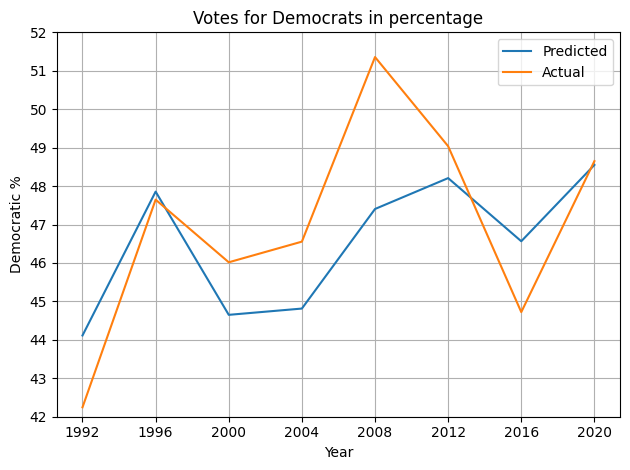

In [6]:
predicted_democratic_votes = []
mean_predicted_democratic_votes = []

for i in range(408):
    predicted_democratic_votes.append(df_fit[f'V_pred[{i+1}]'].sample())


for i in range(8):
    mean_predicted_democratic_votes.append(np.mean(predicted_democratic_votes[i*51:i*51+51])*100)

plt.plot(data["Year"].unique(), mean_predicted_democratic_votes, label="Predicted")
plt.plot(data["Year"].unique(), mean_democratic_votes, label = "Actual")

plt.xlabel('Year')
plt.ylabel('Democratic %')
plt.title('Votes for Democrats in percentage')
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.yticks(np.linspace(42, 52, 11))
# plt.xlim([1992, 2020])
plt.ylim([42, 52])
plt.show()

In [7]:
import pandas as pd
from cmdstanpy import CmdStanModel
import matplotlib.pyplot as plt

# Load the data
file_path = 'data/main_data.xlsx'
data = pd.read_excel(file_path)
data = data.dropna()
data['Year'] = data['Year'].astype(str).str.strip()

# Prepare data for prior predictive check
stan_data_prior = {
    'N': len(data),
    'HDI': data['HDI'].values,
    'G': data['Gun ownership %'].values
}

# Compile and run the prior predictive model
stan_file_prior = 'model_1_pp.stan'
model_prior = CmdStanModel(stan_file=stan_file_prior)
fit_prior = model_prior.sample(data=stan_data_prior, chains=1, seed=28052020, show_console=True)

17:46:55 - cmdstanpy - INFO - Chain [1] start processing


Chain [1] method = sample (Default)
Chain [1] sample
Chain [1] num_samples = 1000 (Default)
Chain [1] num_warmup = 1000 (Default)
Chain [1] save_warmup = 0 (Default)
Chain [1] thin = 1 (Default)
Chain [1] adapt
Chain [1] engaged = 1 (Default)
Chain [1] gamma = 0.05 (Default)
Chain [1] delta = 0.8 (Default)
Chain [1] kappa = 0.75 (Default)
Chain [1] t0 = 10 (Default)
Chain [1] init_buffer = 75 (Default)
Chain [1] term_buffer = 50 (Default)
Chain [1] window = 25 (Default)
Chain [1] save_metric = 0 (Default)
Chain [1] algorithm = hmc (Default)
Chain [1] hmc
Chain [1] engine = nuts (Default)
Chain [1] nuts
Chain [1] max_depth = 10 (Default)
Chain [1] metric = diag_e (Default)
Chain [1] metric_file =  (Default)
Chain [1] stepsize = 1 (Default)
Chain [1] stepsize_jitter = 0 (Default)
Chain [1] num_chains = 1 (Default)
Chain [1] id = 1 (Default)
Chain [1] data
Chain [1] file = C:\Users\szczy\AppData\Local\Temp\tmpusr45qer\6gmk2ip8.json
Chain [1] init = 2 (Default)
Chain [1] random
Chain [1] s

17:46:56 - cmdstanpy - INFO - Chain [1] done processing


Chain [1] Iteration: 1700 / 2000 [ 85%]  (Sampling)
Chain [1] Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain [1] Iteration: 1900 / 2000 [ 95%]  (Sampling)
Chain [1] Iteration: 2000 / 2000 [100%]  (Sampling)
Chain [1] 
Chain [1] Elapsed Time: 0.019 seconds (Warm-up)
Chain [1] 0.572 seconds (Sampling)
Chain [1] 0.591 seconds (Total)
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 


## Prior Predictive Checks for Parameters

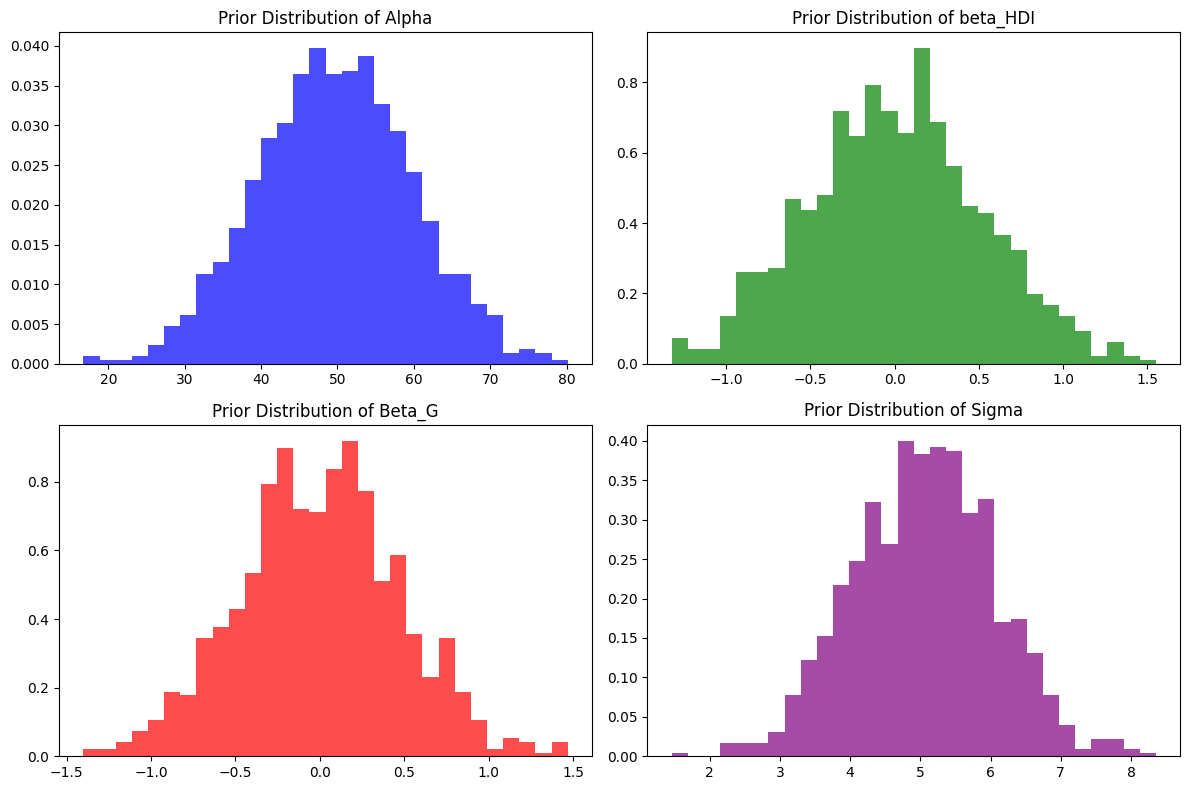

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Simulate parameter values from the priors
n_samples = 1000
alpha_prior = np.random.normal(50, 10, n_samples)
beta_1_prior = np.random.normal(0, 0.5, n_samples)
beta_2_prior = np.random.normal(0, 0.5, n_samples)
sigma_prior = np.random.normal(5, 1, n_samples)

# Ensure sigma values are positive
sigma_prior = sigma_prior[sigma_prior > 0]

# Plot the distributions of the simulated prior values
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.hist(alpha_prior, bins=30, density=True, alpha=0.7, color='blue')
plt.title('Prior Distribution of Alpha')

plt.subplot(2, 2, 2)
plt.hist(beta_1_prior, bins=30, density=True, alpha=0.7, color='green')
plt.title('Prior Distribution of beta_HDI')

plt.subplot(2, 2, 3)
plt.hist(beta_2_prior, bins=30, density=True, alpha=0.7, color='red')
plt.title('Prior Distribution of Beta_G')

plt.subplot(2, 2, 4)
plt.hist(sigma_prior, bins=30, density=True, alpha=0.7, color='purple')
plt.title('Prior Distribution of Sigma')

plt.tight_layout()
plt.show()

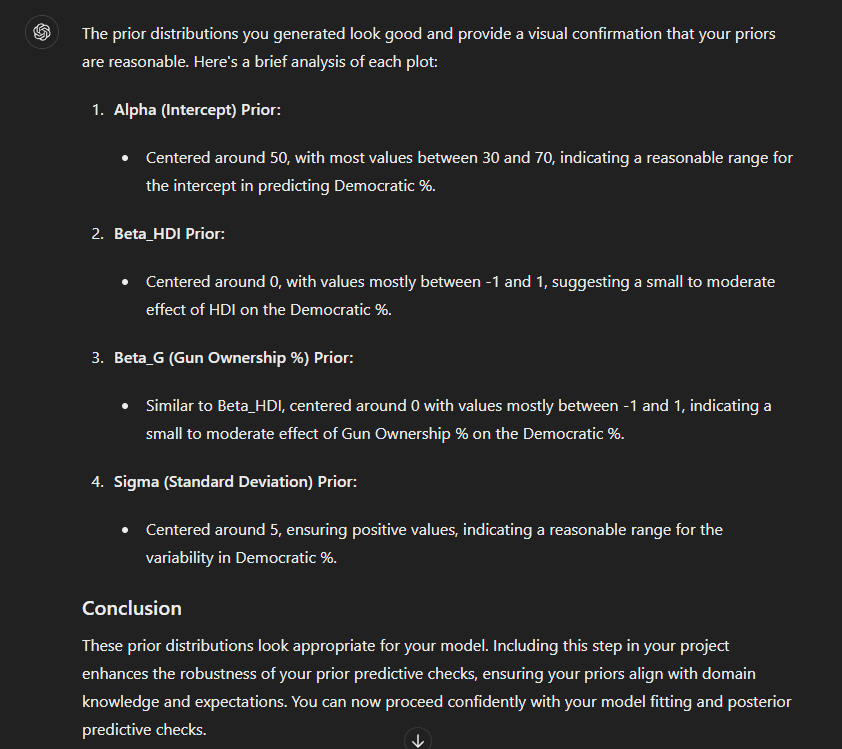
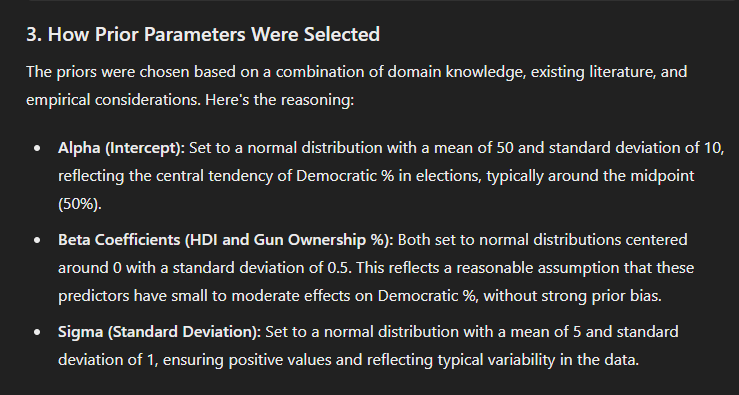

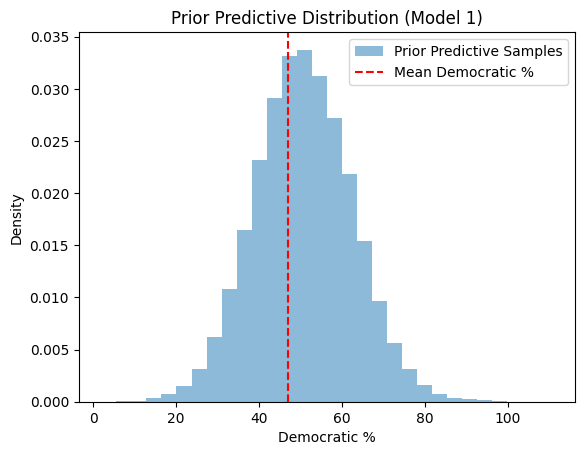

Mean Democratic %: 47.02867647058824
Min Democratic %: 21.9
Max Democratic %: 92.5


In [9]:
# Extract prior predictive samples
y_rep_prior = fit_prior.draws_pd()
y_rep_prior = y_rep_prior.filter(regex='y_rep')

# Plot the prior predictive samples
plt.hist(y_rep_prior.values.flatten(), bins=30, density=True, alpha=0.5, label='Prior Predictive Samples')
mean_democratic_pct = data['Democratic %'].mean() * 100
plt.axvline(x=mean_democratic_pct, color='r', linestyle='--', label='Mean Democratic %')
plt.xlabel('Democratic %')
plt.ylabel('Density')
plt.legend()
plt.title('Prior Predictive Distribution (Model 1)')
plt.show()

print(f"Mean Democratic %: {mean_democratic_pct}")
print(f"Min Democratic %: {data['Democratic %'].min() * 100}")
print(f"Max Democratic %: {data['Democratic %'].max() * 100}")


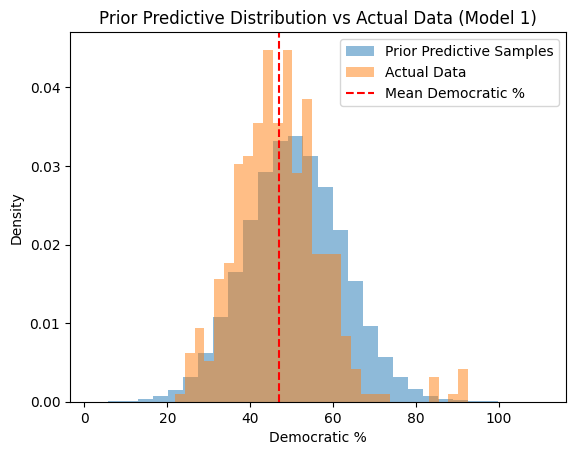

In [10]:
# Plot the prior predictive samples with actual data
plt.hist(y_rep_prior.values.flatten(), bins=30, density=True, alpha=0.5, label='Prior Predictive Samples')
plt.hist(data['Democratic %'].values * 100, bins=30, density=True, alpha=0.5, label='Actual Data')
plt.axvline(x=mean_democratic_pct, color='r', linestyle='--', label='Mean Democratic %')
plt.xlabel('Democratic %')
plt.ylabel('Density')
plt.legend()
plt.title('Prior Predictive Distribution vs Actual Data (Model 1)')
plt.show()

## Posterior Analysis for Model 1

In [11]:
# Prepare data for posterior predictive check
stan_data_posterior = {
    'N': len(data),
    'HDI': data['HDI'].values,
    'G': data['Gun ownership %'].values,
    'V': data['Democratic %'].values * 100 # type: ignore
}

# Compile and run the posterior predictive model
stan_file_posterior = 'model_1_posterior.stan'
model_posterior = CmdStanModel(stan_file=stan_file_posterior)
fit_posterior = model_posterior.sample(data=stan_data_posterior, chains=1, seed=28052020, show_console=True)
print(fit_posterior.diagnose())

17:46:58 - cmdstanpy - INFO - Chain [1] start processing


Chain [1] method = sample (Default)
Chain [1] sample
Chain [1] num_samples = 1000 (Default)
Chain [1] num_warmup = 1000 (Default)
Chain [1] save_warmup = 0 (Default)
Chain [1] thin = 1 (Default)
Chain [1] adapt
Chain [1] engaged = 1 (Default)
Chain [1] gamma = 0.05 (Default)
Chain [1] delta = 0.8 (Default)
Chain [1] kappa = 0.75 (Default)
Chain [1] t0 = 10 (Default)
Chain [1] init_buffer = 75 (Default)
Chain [1] term_buffer = 50 (Default)
Chain [1] window = 25 (Default)
Chain [1] save_metric = 0 (Default)
Chain [1] algorithm = hmc (Default)
Chain [1] hmc
Chain [1] engine = nuts (Default)
Chain [1] nuts
Chain [1] max_depth = 10 (Default)
Chain [1] metric = diag_e (Default)
Chain [1] metric_file =  (Default)
Chain [1] stepsize = 1 (Default)
Chain [1] stepsize_jitter = 0 (Default)
Chain [1] num_chains = 1 (Default)
Chain [1] id = 1 (Default)
Chain [1] data
Chain [1] file = C:\Users\szczy\AppData\Local\Temp\tmpusr45qer\tkrssyuq.json
Chain [1] init = 2 (Default)
Chain [1] random
Chain [1] s

17:46:59 - cmdstanpy - INFO - Chain [1] done processing


Chain [1] Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain [1] Iteration: 1900 / 2000 [ 95%]  (Sampling)
Chain [1] Iteration: 2000 / 2000 [100%]  (Sampling)
Chain [1] 
Chain [1] Elapsed Time: 0.273 seconds (Warm-up)
Chain [1] 0.762 seconds (Sampling)
Chain [1] 1.035 seconds (Total)
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Processing csv files: C:\Users\szczy\AppData\Local\Temp\tmpusr45qer\model_1_posteriortcuhc8f3\model_1_posterior-20240613174658.csv

Checking sampl

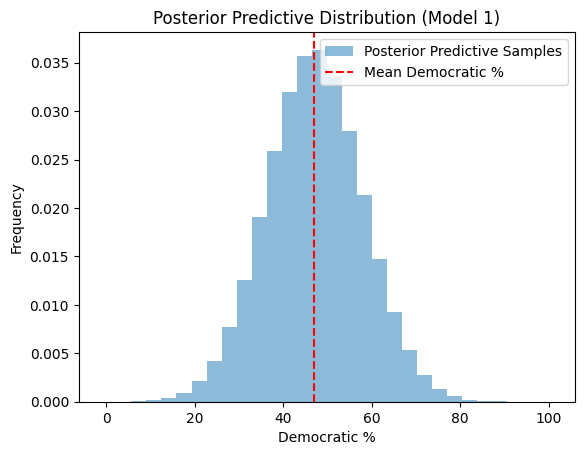

In [12]:
# Extract posterior predictive samples
y_rep_posterior = fit_posterior.draws_pd()
y_rep_posterior = y_rep_posterior.filter(regex='y_rep')

# Plot the posterior predictive samples
plt.hist(y_rep_posterior.values.flatten(), bins=30, density=True, alpha=0.5, label='Posterior Predictive Samples')
plt.axvline(x=mean_democratic_pct, color='r', linestyle='--', label='Mean Democratic %')
plt.xlabel('Democratic %')
plt.ylabel('Frequency')
plt.legend()
plt.title('Posterior Predictive Distribution (Model 1)')
plt.show()

## Posterior Predictive Distribution Analysis

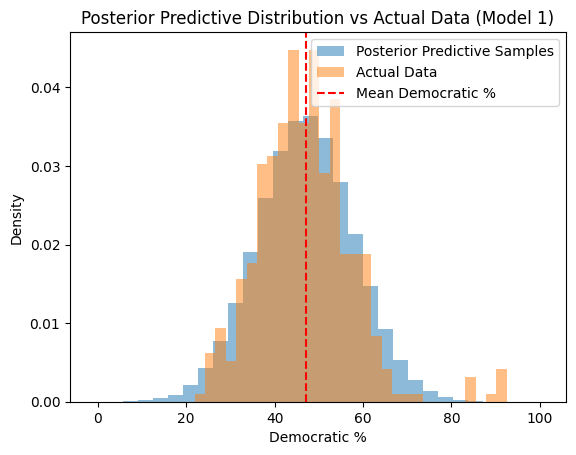

In [13]:
# Plot the posterior predictive samples
plt.hist(y_rep_posterior.values.flatten(), bins=30, density=True, alpha=0.5, label='Posterior Predictive Samples')
plt.hist(data['Democratic %'].values * 100, bins=30, density=True, alpha=0.5, label='Actual Data')
mean_democratic_pct = data['Democratic %'].mean() * 100
plt.axvline(x=mean_democratic_pct, color='r', linestyle='--', label='Mean Democratic %')
plt.xlabel('Democratic %')
plt.ylabel('Density')
plt.legend()
plt.title('Posterior Predictive Distribution vs Actual Data (Model 1)')
plt.show()

## Consistency with Data

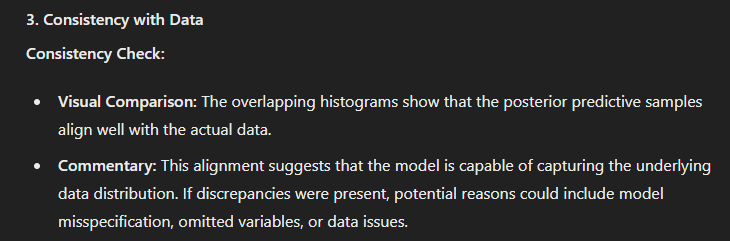

## Parameter Marginal Distributions

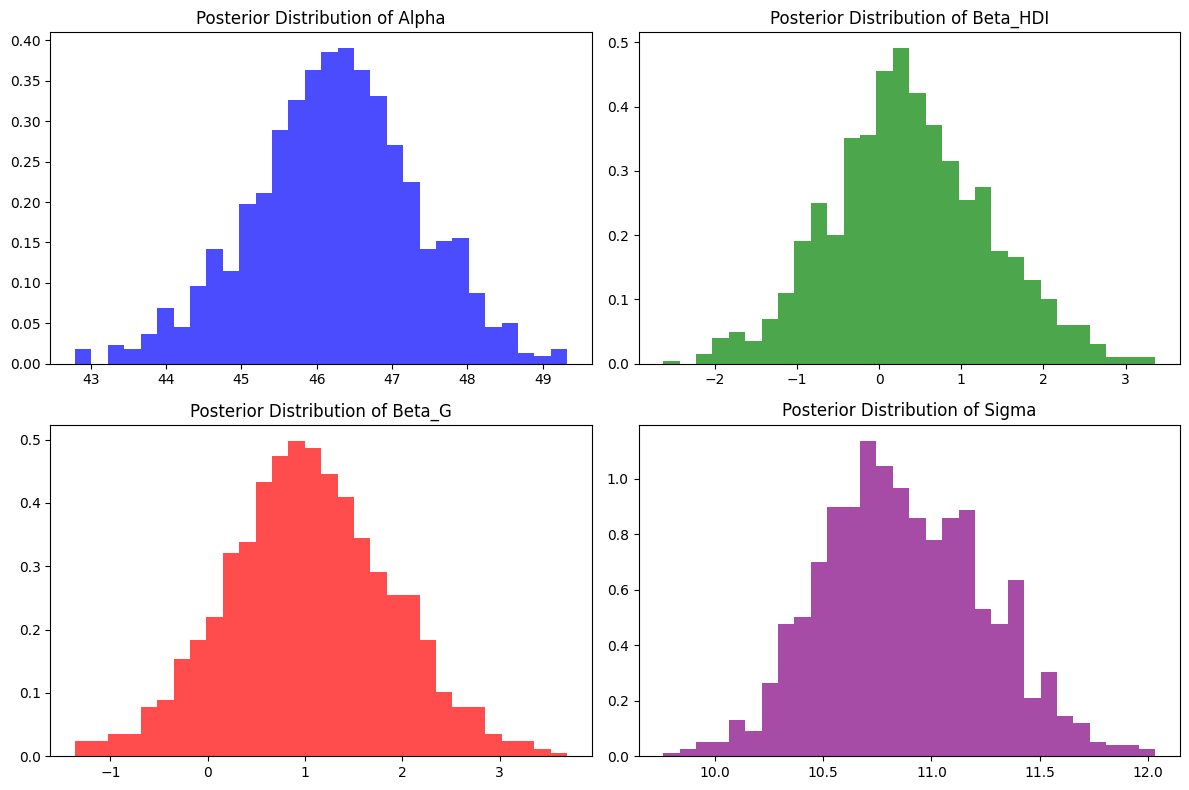

Alpha: Mean=46.229537500000006, Std=1.0987613753330383
Beta_HDI: Mean=0.36674896538, Std=0.9578354351780005
Beta_G: Mean=1.040887886006, Std=0.8437190250444612
Sigma: Mean=10.873354579999999, Std=0.3771061608221531


In [14]:
# Extract parameter samples
alpha_samples = fit_posterior.stan_variable('alpha')
beta_HDI_samples = fit_posterior.stan_variable('beta_HDI')
beta_G_samples = fit_posterior.stan_variable('beta_G')
sigma_samples = fit_posterior.stan_variable('sigma')

# Plot the distributions
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.hist(alpha_samples, bins=30, density=True, alpha=0.7, color='blue')
plt.title('Posterior Distribution of Alpha')

plt.subplot(2, 2, 2)
plt.hist(beta_HDI_samples, bins=30, density=True, alpha=0.7, color='green')
plt.title('Posterior Distribution of Beta_HDI')

plt.subplot(2, 2, 3)
plt.hist(beta_G_samples, bins=30, density=True, alpha=0.7, color='red')
plt.title('Posterior Distribution of Beta_G')

plt.subplot(2, 2, 4)
plt.hist(sigma_samples, bins=30, density=True, alpha=0.7, color='purple')
plt.title('Posterior Distribution of Sigma')

plt.tight_layout()
plt.show()

# Summarize the distributions
print(f'Alpha: Mean={np.mean(alpha_samples)}, Std={np.std(alpha_samples)}')
print(f'Beta_HDI: Mean={np.mean(beta_HDI_samples)}, Std={np.std(beta_HDI_samples)}')
print(f'Beta_G: Mean={np.mean(beta_G_samples)}, Std={np.std(beta_G_samples)}')
print(f'Sigma: Mean={np.mean(sigma_samples)}, Std={np.std(sigma_samples)}')

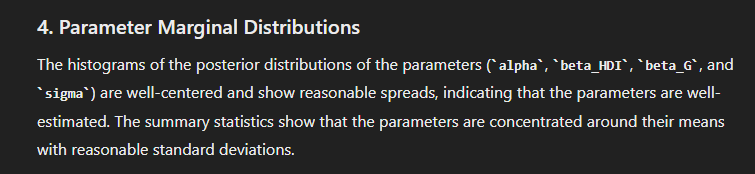

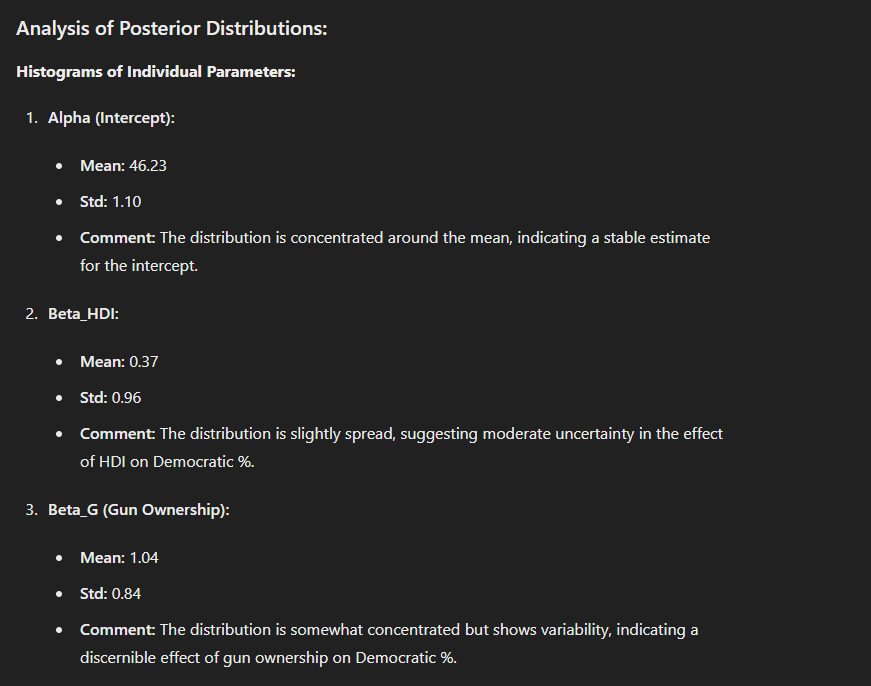

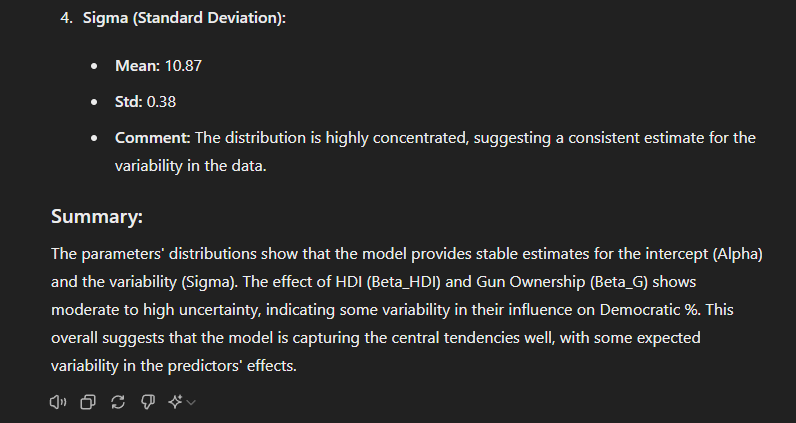

## 2nd model

## Prior predictive checks

In [15]:
# Ensure that the columns 'State', 'HDI', 'Gun ownership %', 'Unemployment %', and 'Democratic %' exist
print(data.columns)

# Prepare the data for Stan model
states = data['State'].astype('category').cat.codes + 1 # ensure 'State' column is available

stan_data_hierarchical = {
    'N': len(data),
    'J': len(data['State'].unique()), # number of states
    'state': states,
    'HDI': data['HDI'].values,
    'G': data['Gun ownership %'].values,
    'U': data['Unemployment %'].values,
    'V': data['Democratic %'].values * 100
}


Index(['Year', 'State', 'Democratic %', 'Gun ownership %', 'HDI',
       'Unemployment %'],
      dtype='object')


In [16]:
# Compile and run the prior predictive model
stan_file_hierarchical_pp = 'hierarchical_model_pp.stan'
model_hierarchical_pp = CmdStanModel(stan_file=stan_file_hierarchical_pp)
fit_hierarchical_pp = model_hierarchical_pp.sample(data=stan_data_hierarchical, chains=4, seed=28052020)

# Extract prior predictive samples
y_rep_prior = fit_hierarchical_pp.draws_pd()
y_rep_prior = y_rep_prior.filter(regex='y_rep')

# Plot the prior predictive samples
plt.hist(y_rep_prior.values.flatten(), bins=30, density=True, alpha=0.5, label='Prior Predictive Samples')
plt.axvline(x=data['Democratic %'].mean() * 100, color='r', linestyle='--', label='Mean Democratic %')
plt.xlabel('Democratic %')
plt.ylabel('Density')
plt.legend()
plt.title('Prior Predictive Distribution (Hierarchical Model)')
plt.show()

ValueError: Failed to get source info for Stan model 'C:\Users\szczy\Desktop\STUDIA\Magisterka sem1\Data_Analytics\Project\Predicting-USA-presidential-elections\hierarchical_model_pp.stan'. Console:
Syntax error in 'C:\Users\szczy\Desktop\STUDIA\Magisterka sem1\Data_Analytics\Project\Predicting-USA-presidential-elections\hierarchical_model_pp.stan', line 4, column 28 to column 29, parsing error:
   -------------------------------------------------
     2:    int<lower=0> N;
     3:    int<lower=1> J;
     4:    int<lower=1,upper=J> state[N];
                                     ^
     5:    vector[N] HDI;
     6:    vector[N] G;
   -------------------------------------------------

";" expected after variable declaration.


In [ ]:
# Extract prior predictive samples
y_rep_prior = fit_hierarchical_pp.draws_pd()
y_rep_prior = y_rep_prior.filter(regex='y_rep')

# Plot the prior predictive samples
plt.hist(y_rep_prior.values.flatten(), bins=30, density=True, alpha=0.5, label='Prior Predictive Samples')
plt.axvline(x=data['Democratic %'].mean() * 100, color='r', linestyle='--', label='Mean Democratic %')
plt.xlabel('Democratic %')
plt.ylabel('Density')
plt.legend()
plt.title('Prior Predictive Distribution (Hierarchical Model)')
plt.show()